<a href="https://colab.research.google.com/github/patrickquadros/facies_classification/blob/main/Classifica%C3%A7%C3%A3o_facies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Os dados foram passados parao o GitHub, para facilitar o acesso
!wget https://raw.githubusercontent.com/patrickquadros/facies_classification/main/NINE_WELLS_INTELLOG.csv

--2022-01-19 14:59:37--  https://raw.githubusercontent.com/patrickquadros/facies_classification/main/NINE_WELLS_INTELLOG.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288630 (282K) [text/plain]
Saving to: ‘NINE_WELLS_INTELLOG.csv’

NINE_WELLS_INTELLOG 100%[===================>] 281.87K  --.-KB/s    in 0.03s   

2022-01-19 14:59:38 (8.60 MB/s) - ‘NINE_WELLS_INTELLOG.csv’ saved [288630/288630]



In [ ]:
import pandas as pd

# Importando os dados
data = pd.read_csv('/content/NINE_WELLS_INTELLOG.csv')

In [ ]:
# Visualizando o DataFrame
data

,WELL,DEPTH,FACIES,W_TAR,SW,VSH,PHI,RW
0,well-102496,437.00,5,0.000,1.000,1.000,0.000,1.054
1,well-102496,437.25,5,0.000,1.000,0.956,0.016,1.054
2,well-102496,437.50,5,0.000,1.000,0.776,0.083,1.054
3,well-102496,437.75,4,0.000,1.000,0.583,0.154,1.054
4,well-102496,438.00,2,0.000,1.000,0.383,0.228,1.054
...,...,...,...,...,...,...,...,...
4239,well-102514,558.50,3,0.015,0.788,0.029,0.172,0.943
4240,well-102514,558.75,3,0.016,0.749,0.002,0.154,0.943
4241,well-102514,559.00,3,0.011,0.797,0.000,0.130,0.943
4242,well-102514,559.25,3,0.012,0.766,0.000,0.124,0.943


In [ ]:
# Visualizando os poços existentes
data.WELL.value_counts()

well-102500    519
well-102497    515
well-102496    513
well-102501    498
well-102498    493
well-102505    447
well-102503    425
well-102514    419
well-102507    415
Name: WELL, dtype: int64

In [ ]:
# Separando o poço de teste (escolhido aleatoriamente)
test_data = data[data.WELL == 'well-102501']
train_data = data[data.WELL != 'well-102501']

In [ ]:
# Visualizando as categorias existentes
data.FACIES.value_counts()

1    1410
4    1160
2     993
5     599
3      63
0      19
Name: FACIES, dtype: int64

In [ ]:
data.keys()

Index(['WELL', 'DEPTH', 'FACIES', 'W_TAR', 'SW', 'VSH', 'PHI', 'RW'], dtype='object')

In [ ]:
# Separando o DataFrame em variáveis correspondentes às Features e ao Target
X = train_data[['W_TAR', 'SW', 'VSH', 'PHI', 'RW']]
y = train_data['FACIES']
X_test = test_data[['W_TAR', 'SW', 'VSH', 'PHI', 'RW']]
y_test = test_data['FACIES']


## Criando modelo de SVM

In [ ]:
import sklearn
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
model_svm = svm.SVC(kernel='rbf', gamma=1, C=30).fit(X, y)

In [ ]:
# Criando função para calcular Acurácia e F1-score
def ac_f1(y_test, y_pred):
  model_pred_accuracy = accuracy_score(y_test,y_pred)
  model_pred_f1 = f1_score(y_test,y_pred, average='weighted')
  print(f'Accuracy: {model_pred_accuracy*100:.2f}%')
  print(f'F1: {model_pred_f1*100:.2f}%')

In [ ]:
# Aplicando modelo SVM ao poço teste
svm_pred = model_svm.predict(X_test)
ac_f1(y_test, svm_pred)

Accuracy: 97.99%
F1: 98.02%


--2022-01-18 22:02:46--  https://raw.githubusercontent.com/DTrimarchi10/confusion_matrix/master/cf_matrix.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4088 (4.0K) [text/plain]
Saving to: ‘cf_matrix.py.5’

cf_matrix.py.5      100%[===================>]   3.99K  --.-KB/s    in 0s      

2022-01-18 22:02:47 (61.2 MB/s) - ‘cf_matrix.py.5’ saved [4088/4088]



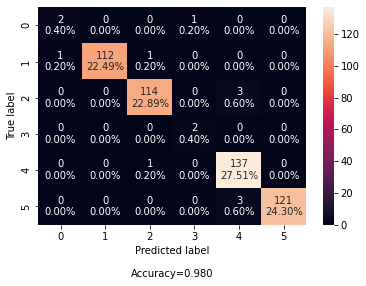

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
!wget https://raw.githubusercontent.com/DTrimarchi10/confusion_matrix/master/cf_matrix.py
from cf_matrix import make_confusion_matrix
facies_categories = ['0','1','2','3','4','5']
cm_svm = confusion_matrix(y_test, svm_pred)
mcm_svm = make_confusion_matrix(cm_svm,
                     categories=facies_categories,
                     cmap='rocket')

## Criando modelo de MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, mode='auto')
model_mlp = Sequential([
                        Dense(100, activation = 'relu'),
                        Dense(50, activation = 'relu'),
                        Dense(7, activation = 'softmax')
])
model_mlp.compile(optimizer= 'Adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_mlp_history = model_mlp.fit(X, y, validation_split=0.2,
                                  callbacks=[model_checkpoint, early_stopping],
                                  epochs=1000)

Epoch 1/1000
94/94 [==============================] - 1s 5ms/step - loss: 1.2820 - accuracy: 0.4643 - val_loss: 1.1443 - val_accuracy: 0.7027
Epoch 2/1000
94/94 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.7500 - val_loss: 0.8368 - val_accuracy: 0.7800
Epoch 3/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.8788 - val_loss: 0.6578 - val_accuracy: 0.8920
Epoch 4/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.9105 - val_loss: 0.5252 - val_accuracy: 0.8840
Epoch 5/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.9152 - val_loss: 0.4475 - val_accuracy: 0.9053
Epoch 6/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.9269 - val_loss: 0.4020 - val_accuracy: 0.9080
Epoch 7/1000
94/94 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9342 - val_loss: 0.3769 - val_accuracy: 0.9080
Epoch 

In [ ]:
# Aplicando modelo MLP ao poço teste
mlp_pred = model_mlp.predict(X_test)
ac_f1(y_test, tf.argmax(mlp_pred, axis=1))

Accuracy: 95.78%
F1: 95.61%


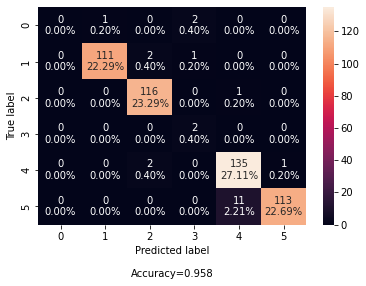

In [ ]:
cm_mlp = confusion_matrix(y_test, tf.argmax(mlp_pred,axis=1))
mcm_mlp = make_confusion_matrix(cm_mlp,
                     categories=facies_categories,
                     cmap='rocket')


## Criando modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
model_rf.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [ ]:
# Aplicando Random Forest ao poço teste
rf_pred = model_rf.predict(X_test)
ac_f1(y_test, rf_pred)

Accuracy: 99.60%
F1: 99.62%


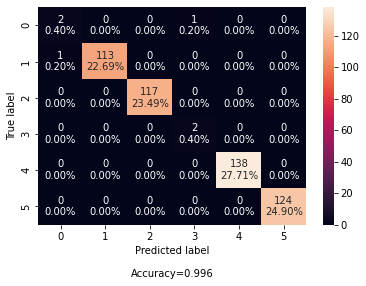

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred)
mcm_rf = make_confusion_matrix(cm_rf,
                     categories=facies_categories,
                     cmap='rocket')

## Criando modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Aplicando KNN ao poço teste
knn_pred = model_knn.predict(X_test)
ac_f1(y_test, knn_pred)

Accuracy: 92.37%
F1: 92.11%


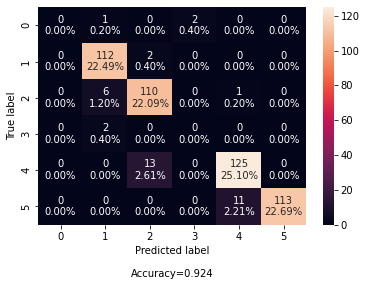

In [ ]:
cm_knn = confusion_matrix(y_test, knn_pred)
mcm_knn = make_confusion_matrix(cm_knn,
                     categories=facies_categories,
                     cmap='rocket')

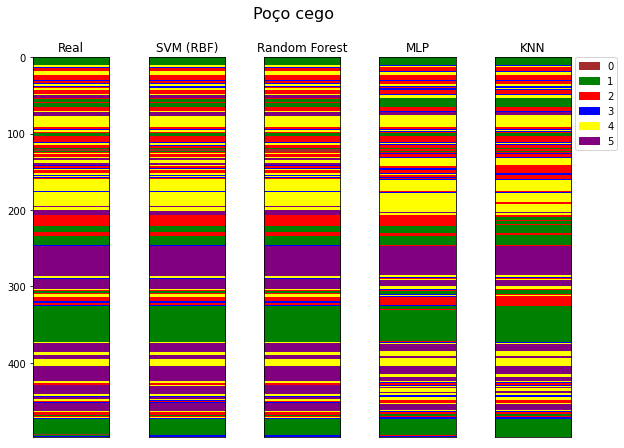

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import numpy as np
facies2_column = np.asarray(y_test).reshape(len(y_test),1)
facies2_column_svm = np.asarray(svm_pred).reshape(len(svm_pred),1)
facies2_column_rf = np.asarray(rf_pred).reshape(len(rf_pred),1)
facies2_column_mlp = np.asarray(tf.argmax(mlp_pred,axis=1)).reshape(len(tf.argmax(mlp_pred,axis=1)),1)
facies2_column_knn = np.asarray(knn_pred).reshape(len(knn_pred),1)
values = np.unique(facies2_column.ravel())
categories=['0','1','2','3','4','5']

import matplotlib as mpl
colors = ['brown', 'green', 'red', 'blue', 'yellow', 'purple']
bounds = [0,1,2,3,4,5,6]

cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1,5, figsize = (10, 7))
fig.suptitle('Poço cego', fontsize=16)
im = ax[0].imshow(np.repeat(facies2_column, 100, axis=1),cmap = cmap, interpolation=None)
ax[0].set_title('Real')
ax[0].set_xticks([])
ax[1].imshow(np.repeat(facies2_column_svm, 100, axis=1),cmap = cmap, interpolation=None)
ax[1].set_title('SVM (RBF)')
ax[1].set_yticks([])
ax[1].set_xticks([]) 
ax[2].imshow(np.repeat(facies2_column_rf, 100, axis=1),cmap = cmap, interpolation=None)
ax[2].set_title('Random Forest')
ax[2].set_yticks([]) 
ax[2].set_xticks([])
ax[3].imshow(np.repeat(facies2_column_mlp, 100, axis=1),cmap = cmap, norm=norm, interpolation=None)
ax[3].set_title('MLP')
ax[3].set_yticks([]) 
ax[3].set_xticks([])
ax[4].imshow(np.repeat(facies2_column_knn, 100, axis=1),cmap = cmap, norm=norm, interpolation=None)
ax[4].set_title('KNN')
ax[4].set_yticks([]) 
ax[4].set_xticks([])
colors = [im.cmap(im.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=categories[values[i]]) ) for i in range(len(values)) ]

plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )